In [16]:
! pip install tensorflow-gpu

In [17]:
! pip install keras

In [18]:
! pip install pandas

In [19]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.1
Hub version: 0.9.0
GPU is available


Machine Learning Model

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import os
import cv2

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
file="/content/drive/My Drive/Colab Notebooks/Diabetes1.csv"


In [25]:
import pandas as pd
df=pd.read_csv(file)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

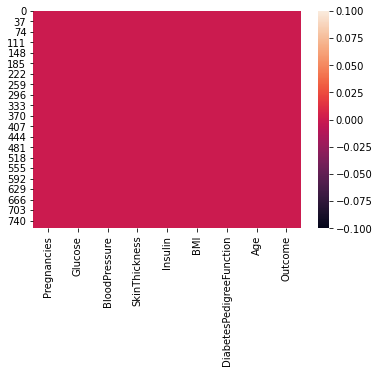

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(df.isnull())

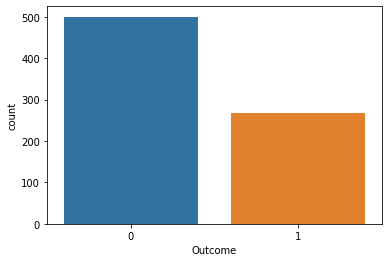

In [ ]:
sns.countplot('Outcome', data=df)
plt.show()


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

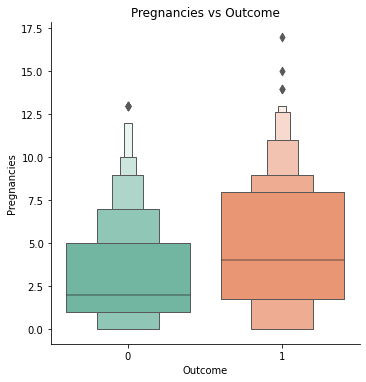

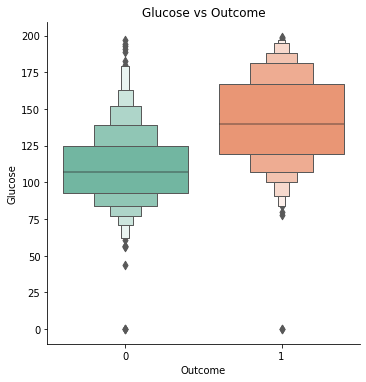

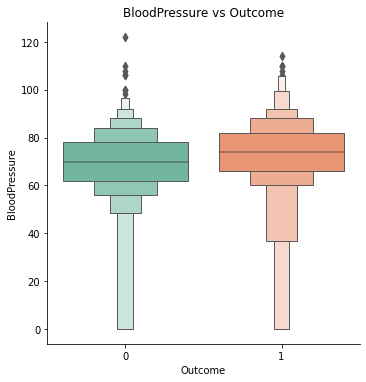

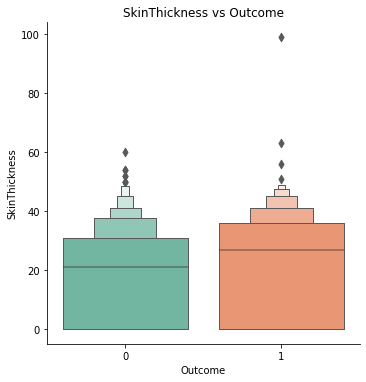

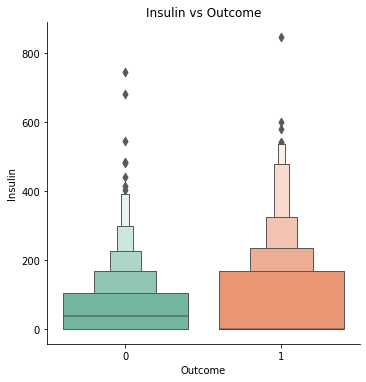

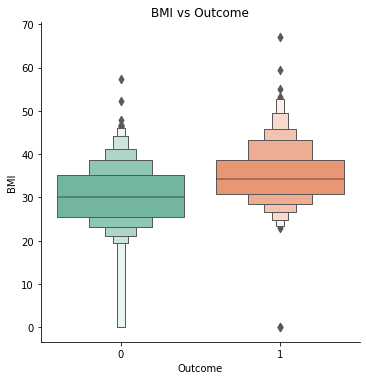

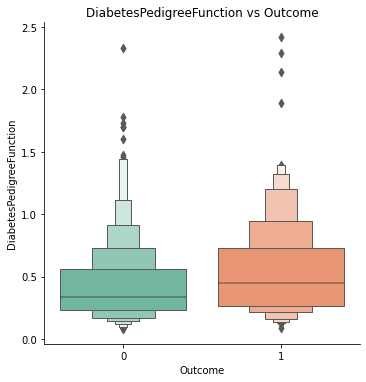

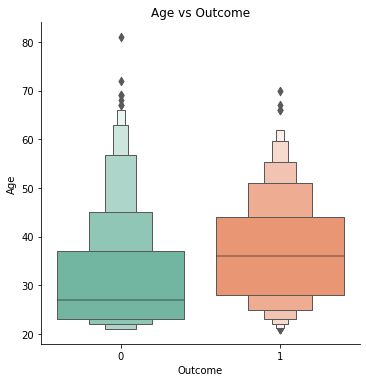

In [ ]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in cols:
  sns.catplot(x='Outcome',y=i,data=df,kind='boxen',palette='Set2')
  plt.title('%s vs %s' %(i,'Outcome'))

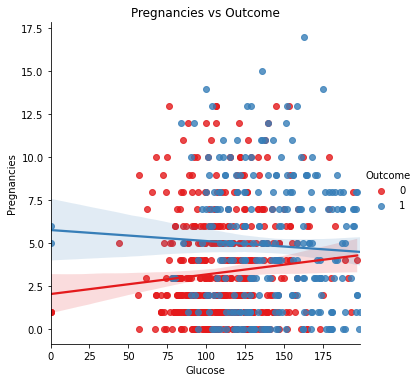

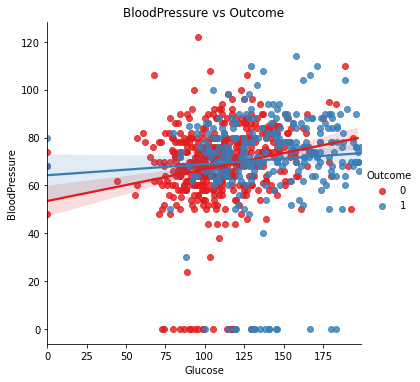

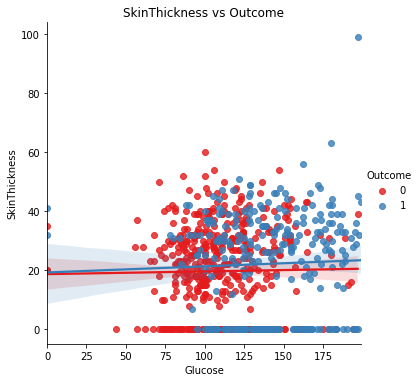

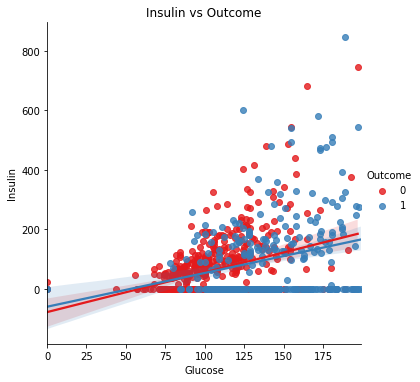

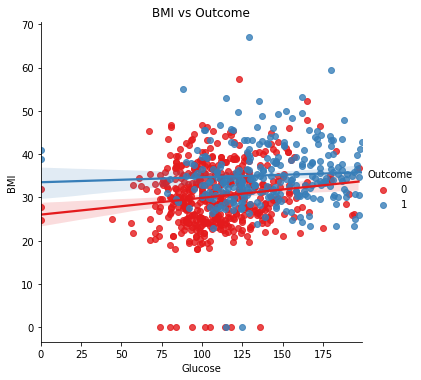

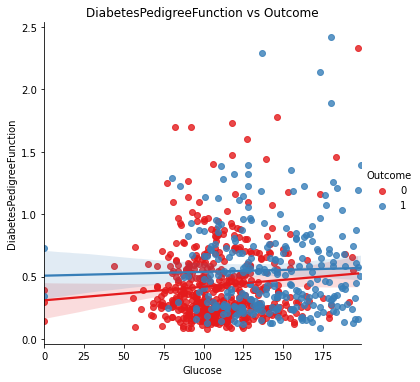

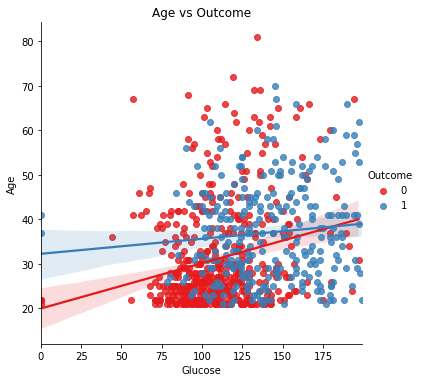

In [ ]:
cols=['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in cols:
  sns.lmplot(x='Glucose',y=i,data=df,hue='Outcome',palette='Set1')
  plt.title('%s vs %s' %(i,'Outcome'))

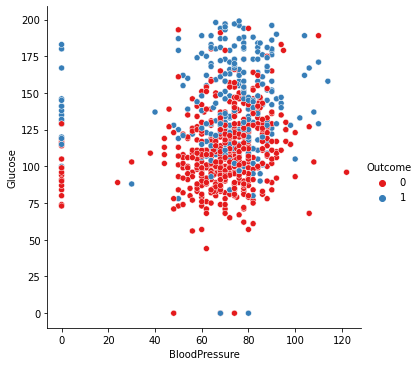

In [ ]:
sns.relplot(x='BloodPressure',y='Glucose',hue='Outcome',data=df,palette='Set1')

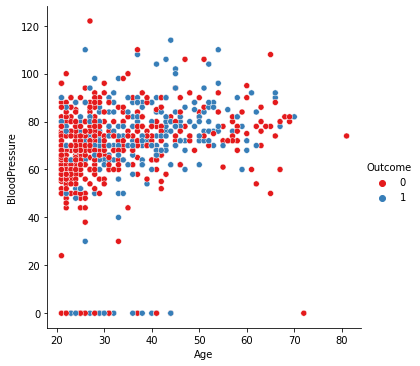

In [ ]:
sns.relplot(x='Age',y='BloodPressure',hue='Outcome',data=df,palette='Set1')
# "point", "bar", "strip", "swarm", "box", "violin", or "boxen".

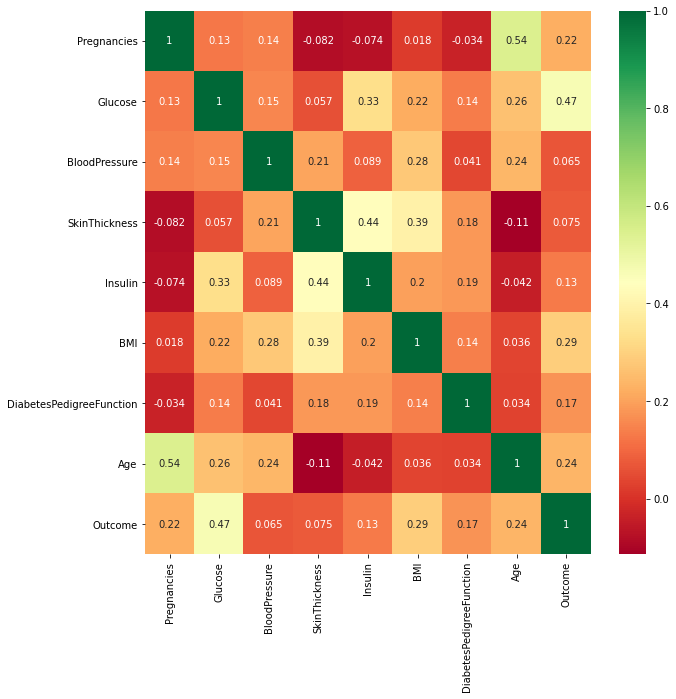

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [64]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [65]:

# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [66]:
print(selection.feature_importances_)

[0.10863674 0.22648084 0.1010286  0.08218784 0.07674856 0.14133156
 0.1199372  0.14364867]


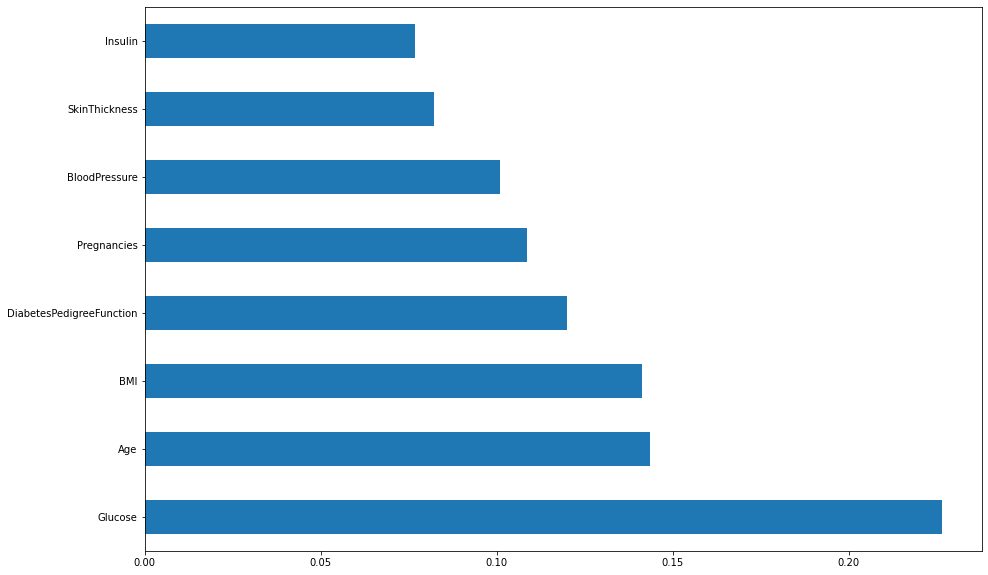

In [67]:
plt.figure(figsize=(15,10))
feature_imp=pd.Series(selection.feature_importances_, index=X.columns)
feature_imp.nlargest(14).plot(kind='barh')

In [68]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [69]:
svmodel=SVC()
svmodel.fit(X_train,y_train)
svmodel.score(X_test,y_test)

0.7445887445887446

In [ ]:
value=[]
algo=[]
def cross_val_score_model(model,name):
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=2)
    cv_score=cross_val_score(model,X,y,cv=cv).mean()
    print('CV_Score' + ' '+ str(model) +': '+ str(cv_score))
    value.append(cv_score)
    algo.append(name)

cross_val_score_model(SVC(),'SVC')
cross_val_score_model(RandomForestClassifier(),'Random Forest Classifier')
cross_val_score_model(XGBClassifier(),'XGB Classifier')
cross_val_score_model(KNeighborsClassifier(),'KNeighbors Classifier')
cross_val_score_model(LogisticRegression(solver='liblinear',multi_class='auto'),'Logistic Regression')

CV_Score SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False): 0.7601731601731602
CV_Score RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False): 0.7662337662337662
CV_Score XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
    

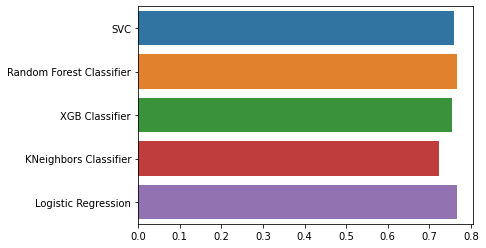

In [ ]:
sns.barplot(x=value,y=algo)
plt.show()

In [ ]:
pd.DataFrame({'Model':algo, 'Score':value})

,Model,Score
0,SVC,0.760173
1,Random Forest Classifier,0.766234
2,XGB Classifier,0.753247
3,KNeighbors Classifier,0.722078
4,Logistic Regression,0.765368


In [ ]:

model_params={
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[100,200,500,600],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt'],
            'max_depth' : [5,10,15,20,25,30,35,40,45,50]
        }
    },
        'XGBoost':{
        'model':XGBClassifier(),
        'params':{
            'max_depth': [2, 3, 5, 10, 15,30,50],
            'booster':['gbtree','gblinear'],
            'learning_rate':[0.05,0.1,0.15,0.20,0.5],
            'min_child_weight':[1,2,3,4]

        }
    }
}

In [ ]:
scores=[]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=2)
for model_name, mp in model_params.items():
    random_clf=RandomizedSearchCV(mp['model'],mp['params'],cv=cv, return_train_score=False)
    random_clf.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':random_clf.best_score_,
        'best param':random_clf.best_params_,
        'best estimator':random_clf.best_estimator_
    })

ds=pd.DataFrame(scores,columns=['model','best_score','best param','best estimator'])
ds


,model,best_score,best param,best estimator
0,random_forest,0.768831,"{'n_estimators': 500, 'max_features': 'sqrt', ...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
1,XGBoost,0.767965,"{'min_child_weight': 3, 'max_depth': 5, 'learn...","XGBClassifier(base_score=0.5, booster='gbtree'..."


In [ ]:
def display_text_max_col_width(df, width):
    with pd.option_context('display.max_colwidth', width):
        print(df)

display_text_max_col_width(ds['best param'], 800)

0    {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy'}
1       {'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.05, 'booster': 'gbtree'}
Name: best param, dtype: object


In [ ]:
cross_val_score_model(RandomForestClassifier(n_estimators= 500,criterion='entropy',max_features= 'sqrt', max_depth= 15),'Random Forest Classifier_Best')
cross_val_score_model(XGBClassifier(min_child_weight=3, max_depth=5,learning_rate= 0.05, booster= 'gbtree'),'XGB Classifier_Best')

CV_Score RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False): 0.7722943722943724
CV_Score XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=No

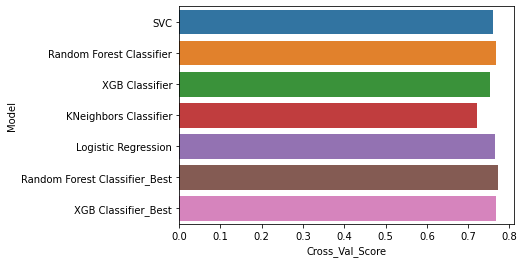

In [ ]:

sns.barplot(x=value,y=algo)
plt.xlabel('Cross_Val_Score')
plt.ylabel('Model')
plt.show()

In [ ]:
pd.DataFrame({'Model':algo, 'Score':value})

,Model,Score
0,SVC,0.760173
1,Random Forest Classifier,0.766234
2,XGB Classifier,0.753247
3,KNeighbors Classifier,0.722078
4,Logistic Regression,0.765368
5,Random Forest Classifier_Best,0.772294
6,XGB Classifier_Best,0.767965


In [ ]:
rf_clas_best=RandomForestClassifier(n_estimators= 500,criterion='entropy',max_features= 'sqrt', max_depth= 15)
rf_clas_best.fit(X_train,y_train)
rf_clas_best_y_pred=rf_clas_best.predict(X_test)
score=accuracy_score(y_test,rf_clas_best_y_pred )
score

0.7705627705627706

In [ ]:
df.iloc[101]

Pregnancies                   1.000
Glucose                     151.000
BloodPressure                60.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          26.100
DiabetesPedigreeFunction      0.179
Age                          22.000
Outcome                       0.000
Name: 101, dtype: float64

In [ ]:
a=[[1,151,60,0,0,26.1,0.179,22]]
a=s.transform(a)
b=rf_clas_best.predict(a)
b

array([0])

ANN MODEL

In [27]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [110]:
model = Sequential([
    Dense(128, input_dim=8, activation='relu'),
    Dense(64,  activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
r=model.fit(X_train, y_train, epochs=25, batch_size=1,validation_data=(X_test,y_test))

Epoch 1/25
537/537 [==============================] - 1s 2ms/step - loss: 0.5239 - accuracy: 0.7412 - val_loss: 0.4825 - val_accuracy: 0.7576
Epoch 2/25
537/537 [==============================] - 1s 2ms/step - loss: 0.4746 - accuracy: 0.7765 - val_loss: 0.4945 - val_accuracy: 0.7662
Epoch 3/25
537/537 [==============================] - 1s 3ms/step - loss: 0.4585 - accuracy: 0.7728 - val_loss: 0.4652 - val_accuracy: 0.7706
Epoch 4/25
537/537 [==============================] - 1s 2ms/step - loss: 0.4460 - accuracy: 0.7803 - val_loss: 0.4813 - val_accuracy: 0.7662
Epoch 5/25
537/537 [==============================] - 1s 3ms/step - loss: 0.4303 - accuracy: 0.7933 - val_loss: 0.4715 - val_accuracy: 0.7706
Epoch 6/25
537/537 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.7970 - val_loss: 0.4892 - val_accuracy: 0.7576
Epoch 7/25
537/537 [==============================] - 1s 2ms/step - loss: 0.4166 - accuracy: 0.8045 - val_loss: 0.4734 - val_accuracy: 0.7619
Epoch 

In [111]:
k=r.history['val_accuracy']
print('The Validation Accuracy of ANN Model: ', np.mean(k))

The Validation Accuracy of ANN Model:  0.7575757598876953


In [112]:
yp= model.predict(X_test)
yp

array([[2.71150057e-05],
       [1.41935274e-02],
       [7.42411194e-03],
       [7.49366820e-01],
       [1.40276924e-01],
       [9.95623064e-04],
       [1.26640149e-03],
       [3.26219201e-02],
       [1.58856448e-04],
       [2.13152125e-01],
       [7.38382041e-02],
       [7.64162317e-02],
       [9.98026073e-01],
       [1.47101581e-01],
       [1.45600216e-05],
       [9.66501296e-01],
       [3.52816343e-01],
       [1.36917765e-06],
       [1.53929153e-02],
       [9.25621212e-01],
       [9.99013186e-01],
       [9.28710163e-01],
       [6.32206502e-04],
       [8.62249583e-02],
       [1.66251021e-03],
       [2.26750281e-02],
       [3.14266160e-02],
       [3.66306126e-01],
       [5.06092608e-02],
       [2.88362876e-02],
       [9.60665271e-02],
       [5.73307097e-01],
       [5.00358510e-06],
       [1.39213637e-01],
       [7.01467931e-01],
       [9.62488949e-01],
       [6.15046442e-01],
       [5.05416691e-01],
       [1.61206238e-02],
       [1.23205455e-03],


In [113]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [114]:
y_pred

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0]

In [115]:
y_pred_labels=np.unique(y_pred, return_counts=True)
y_pred_labels

(array([0, 1]), array([183,  48]))

In [116]:
y_test_labels=np.unique(y_test, return_counts=True)
y_test_labels

(array([0, 1]), array([155,  76]))

In [117]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test, y_pred)
c_m

array([[136,  19],
       [ 47,  29]])

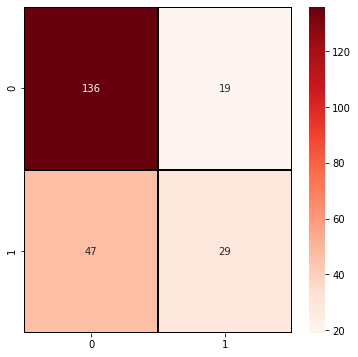

In [118]:

import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' )

In [119]:
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.7142857142857143

In [120]:
X_test[0]

array([-0.58225487, -1.09492372,  0.2360973 , -0.08606749, -0.26946915,
       -0.36734288, -0.73568555, -0.96857839])

In [121]:
y_test.iloc[0]

0

In [122]:
b=model.predict([[-0.58225487, -1.09492372,  0.2360973 , -0.08606749, -0.26946915,
       -0.36734288, -0.73568555, -0.96857839]])
b

array([[2.711506e-05]], dtype=float32)

In [123]:
if(b>0.5):
  print('1')
else:
  print('0')

0


In [124]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.74      0.88      0.80       155
           1       0.60      0.38      0.47        76

    accuracy                           0.71       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.70      0.71      0.69       231



In [125]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [86]:
def create_model(dense_layers,activation,optimizer):
    model = Sequential()
    for index, lsize in enumerate(dense_layers):
        # Input Layer - includes the input_shape
        if index == 0:
          model.add(Dense(lsize,activation=activation,input_shape=(8,)))
        else:
          model.add(Dense(lsize,activation=activation))   
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer = optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model

model1 = KerasClassifier(build_fn=create_model,verbose=1)

param_grid = {'dense_layers': [(128,64),(64,16),(128,64,16)],
              'activation':['relu'],
              'optimizer':['adam'],
              'epochs':[25],
              'batch_size':[1]}

grid = GridSearchCV(model1,param_grid=param_grid, cv=5)

grid_results = grid.fit(X_train,y_train)

print('Parameters of the best model: ')
print(grid_results.best_params_)


Epoch 1/25
429/429 [==============================] - 1s 2ms/step - loss: 0.5213 - accuracy: 0.7599
Epoch 2/25
429/429 [==============================] - 1s 2ms/step - loss: 0.4566 - accuracy: 0.7925
Epoch 3/25
429/429 [==============================] - 1s 2ms/step - loss: 0.4372 - accuracy: 0.7972
Epoch 4/25
429/429 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.8065
Epoch 5/25
429/429 [==============================] - 1s 2ms/step - loss: 0.4186 - accuracy: 0.7879
Epoch 6/25
429/429 [==============================] - 1s 2ms/step - loss: 0.4140 - accuracy: 0.8089
Epoch 7/25
429/429 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8182
Epoch 8/25
429/429 [==============================] - 1s 2ms/step - loss: 0.3886 - accuracy: 0.8182
Epoch 9/25
429/429 [==============================] - 1s 2ms/step - loss: 0.3740 - accuracy: 0.8112
Epoch 10/25
429/429 [==============================] - 1s 2ms/step - loss: 0.3758 - accuracy: 0.8228

In [87]:
params=grid_results.best_params_
params

{'activation': 'relu',
 'batch_size': 1,
 'dense_layers': (64, 16),
 'epochs': 25,
 'optimizer': 'adam'}

In [126]:
model_best = Sequential([
    Dense(64, input_dim=8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_best.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

r_best=model_best.fit(X_train, y_train, epochs=25, batch_size=1,validation_data=(X_test,y_test))

Epoch 1/25
537/537 [==============================] - 1s 2ms/step - loss: 0.5490 - accuracy: 0.7430 - val_loss: 0.5067 - val_accuracy: 0.7273
Epoch 2/25
537/537 [==============================] - 1s 2ms/step - loss: 0.4697 - accuracy: 0.7672 - val_loss: 0.4857 - val_accuracy: 0.7576
Epoch 3/25
537/537 [==============================] - 1s 2ms/step - loss: 0.4528 - accuracy: 0.7784 - val_loss: 0.4853 - val_accuracy: 0.7532
Epoch 4/25
537/537 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.7970 - val_loss: 0.4910 - val_accuracy: 0.7576
Epoch 5/25
537/537 [==============================] - 1s 2ms/step - loss: 0.4344 - accuracy: 0.7877 - val_loss: 0.4926 - val_accuracy: 0.7489
Epoch 6/25
537/537 [==============================] - 1s 2ms/step - loss: 0.4342 - accuracy: 0.7952 - val_loss: 0.4912 - val_accuracy: 0.7576
Epoch 7/25
537/537 [==============================] - 1s 2ms/step - loss: 0.4267 - accuracy: 0.7952 - val_loss: 0.4908 - val_accuracy: 0.7662
Epoch 

In [127]:
y_pred_best = model_best.predict(X_test)

In [128]:
k1=r_best.history['val_accuracy']
print('The Validation Accuracy of ANN Model: ', np.mean(k1))

The Validation Accuracy of ANN Model:  0.7577489113807678


In [129]:
y_pred11 = []
for element in y_pred_best:
    if element > 0.5:
        y_pred11.append(1)
    else:
        y_pred11.append(0)

In [130]:
y_pred11

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0]

In [131]:
y_pred_labels1=np.unique(y_pred11, return_counts=True)
y_pred_labels1

(array([0, 1]), array([170,  61]))

In [132]:
y_test_labels=np.unique(y_test, return_counts=True)
y_test_labels

(array([0, 1]), array([155,  76]))

In [133]:
from sklearn.metrics import confusion_matrix
c_m1 = confusion_matrix(y_test, y_pred11)
c_m1

array([[135,  20],
       [ 35,  41]])

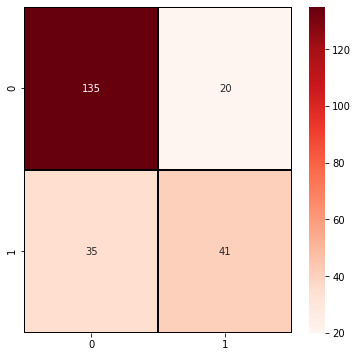

In [134]:
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m1,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' )

In [135]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred11))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83       155
           1       0.67      0.54      0.60        76

    accuracy                           0.76       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.75      0.76      0.75       231

